# Inadimplência de clientes de cartão de crédito

A base de dados pode ser encontrada em  [https://www.kaggle.com/datasets/gabrieloliveirasan/inadimpelncia-de-clientes](https://www.kaggle.com/datasets/gabrieloliveirasan/inadimplncia-de-clientes-de-carto-de-crdito?resource=download)

### Descrição dos dados

**Variáveis preditivas ou explicativas:** Limite de crédito, Sexo (1 = masculino; 2 = feminino), Escolaridade (1 = pós-graduação; 2 = graduação; 3 = ensino médio; 4 = outros), Estado Civil (1 = casado; 2 = solteiro; 3 = outros), Idade, Status de pagamento (Setembro, Agosto, Julho, Junho, Maio, Abril), Valor da fatura (Setembro, Agosto, Julho, Junho, Maio, Abril), Valor do pagamento (Setembro, Agosto, Julho, Junho, Maio, Abril).

Status de pagamento, Valor da fatura e Valor do pagamento, correspondem cada uma a 6 variáveis, sendo que, a variável, Status de Pagamento, recebe os seguintes valores (-1 = Pago devidamente; 1 = Atraso no pagamento por 1 Mês; 2 = Atraso no pagamento por 2 Mês; ...; 9 = Atraso no pagamento por 9 Mês ou Mais)

Mais detalhes sobre a pesquisa podem ser encontrados em 
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

A variável resposta foi empregada como sendo, *pagamento inadimplente (Sim = 1, Não = 0)*. Aqui, vamos usar esta variável da seguinte forma.

**Variável resposta ou predita:**  Status Pagamento (1 = Inadimplente, 0 = Adimplente)

A base de dados é de clientes de cartão de crédito com origem em Taiwan, onde a moeda vigente é o Novo dólar taiwanês (NT\$).

## Pré-processamento de dados e análise descritiva

Nesta etapa, é realizados o tratamento dos dados e obtido algumas medidas descritivas que auxiliam no entendimento dos dados, algumas etapas de tratamentos são mostradas diretamente para tornar menos cansativa a leitura.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('credit.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


### Renomeando as variáveis 

Esse processo facilitará o entendimento e a visualização dos dados posteriormente.

In [3]:
df.rename(columns={'ID': 'ID Cliente', 'LIMIT_BAL': 'Limite_Credito','SEX':'Sexo', 'EDUCATION': 'Escolaridade', 
                  'MARRIAGE':'Est_Civil', 'AGE':'Idade', 'PAY_0':'Status_Set', 'PAY_2':'Status_Ago', 
                   'PAY_3':'Status_Jul', 'PAY_4':'Status_Jun', 'PAY_5':'Status_Mai', 'PAY_6':'Status_Abr', 
                   'BILL_AMT1':'Valor_Set', 'BILL_AMT2':'Valor_Ago', 'BILL_AMT3':'Valor_Jul', 
                   'BILL_AMT4':'Valor_Jun', 'BILL_AMT5':'Valor_Mai', 'BILL_AMT6':'Valor_Abr', 
                   'PAY_AMT1':'Pag_Set', 'PAY_AMT2':'Pag_Ago', 'PAY_AMT3':'Pag_Jul', 
                   'PAY_AMT4':'Pag_Jun', 'PAY_AMT5':'Pag_Mai', 'PAY_AMT6':'Pag_Abr', 
                   'default payment next month': 'Status Pagamento'}, inplace = True)


In [4]:
df.describe()

,ID Cliente,Limite_Credito,Sexo,Escolaridade,Est_Civil,Idade,Status_Set,Status_Ago,Status_Jul,Status_Jun,...,Valor_Jun,Valor_Mai,Valor_Abr,Pag_Set,Pag_Ago,Pag_Jul,Pag_Jun,Pag_Mai,Pag_Abr,Status Pagamento
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Observa-se valores negativos em *min* da função *describe* para as variáveis que refere-se ao valor da fatura, uma análise mais detalhada permitiu perceber que esses valores negativos são comuns da base dados de crédito. Observe também que, pela contagem dos dados não existe nenhuma observação faltante, mas, mesmo assim, pode-se executar o código seguinte. 

In [5]:
df.isnull().sum()

ID Cliente          0
Limite_Credito      0
Sexo                0
Escolaridade        0
Est_Civil           0
Idade               0
Status_Set          0
Status_Ago          0
Status_Jul          0
Status_Jun          0
Status_Mai          0
Status_Abr          0
Valor_Set           0
Valor_Ago           0
Valor_Jul           0
Valor_Jun           0
Valor_Mai           0
Valor_Abr           0
Pag_Set             0
Pag_Ago             0
Pag_Jul             0
Pag_Jun             0
Pag_Mai             0
Pag_Abr             0
Status Pagamento    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ID Cliente        30000 non-null  int64
 1   Limite_Credito    30000 non-null  int64
 2   Sexo              30000 non-null  int64
 3   Escolaridade      30000 non-null  int64
 4   Est_Civil         30000 non-null  int64
 5   Idade             30000 non-null  int64
 6   Status_Set        30000 non-null  int64
 7   Status_Ago        30000 non-null  int64
 8   Status_Jul        30000 non-null  int64
 9   Status_Jun        30000 non-null  int64
 10  Status_Mai        30000 non-null  int64
 11  Status_Abr        30000 non-null  int64
 12  Valor_Set         30000 non-null  int64
 13  Valor_Ago         30000 non-null  int64
 14  Valor_Jul         30000 non-null  int64
 15  Valor_Jun         30000 non-null  int64
 16  Valor_Mai         30000 non-null  int64
 17  Valor_Abr         30000 non-nul

Todas as variáveis foram identificadas como valores inteiros.

### Tratando inconsistências

In [7]:
df[['Est_Civil']].value_counts() # 1 = casado; 2 = solteiro; 3 = outros

Est_Civil
2            15964
1            13659
3              323
0               54
dtype: int64

In [8]:
df[['Escolaridade']].value_counts() #1 = pós-graduação; 2 = universidade; 3 = ensino médio; 4 = outros

Escolaridade
2               14030
1               10585
3                4917
5                 280
4                 123
6                  51
0                  14
dtype: int64

Algumas inconsistências foram encontradas e optou-se pelo seguinte:

- Estado civil: valores diferentes de 1,2 ou 3, foi considerado como pertencentes a classe *outros*
- Escolaridade: valores diferentes de 1,2,3 ou 4, foi considerado como pertencentes a classe *outros*

Poderia ter optado por remover as variáveis, porém observações classificadas como *outros* em estado civil, podem tanto ser divorciados ou viúvos, por exemplo, como isso não foi bem definido, optei por realizar a tratativa desta maneira, de modo que que *outros* segue como sendo aqueles em que a classe não foi especificamente definida, o mesmo vale para *escolaridade*.

In [9]:
df.loc[df['Est_Civil']==0, 'Est_Civil']=3

df.loc[df['Escolaridade']>4, 'Escolaridade']=4
df.loc[df['Escolaridade']==0, 'Escolaridade']=4

In [10]:
del df['ID Cliente']

### Avaliando o comportamento dos dados usando boxplot

<AxesSubplot:>

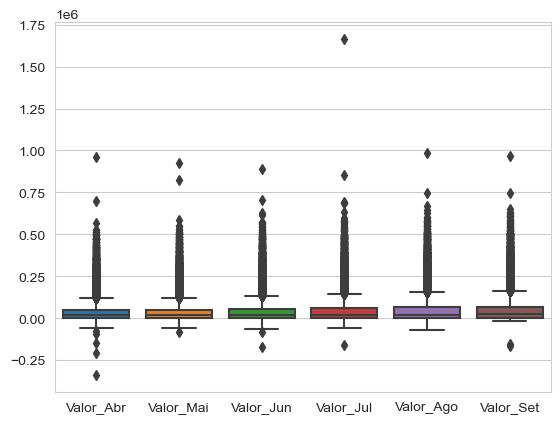

In [11]:
#%%hidden
sns.set_style("whitegrid")
sns.boxplot(data=df[["Valor_Abr","Valor_Mai","Valor_Jun",
                     "Valor_Jul","Valor_Ago","Valor_Set"]], orient='v')

<AxesSubplot:>

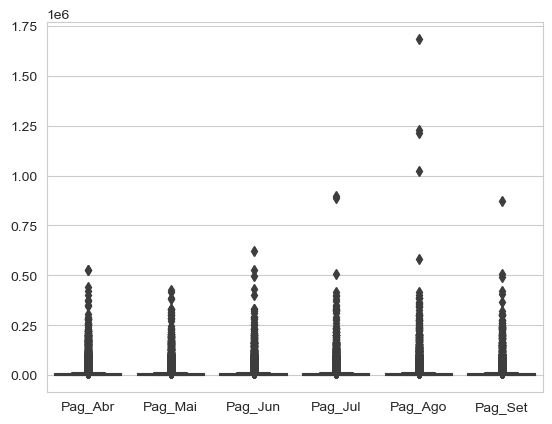

In [12]:
sns.set_style("whitegrid")
sns.boxplot(data=df[["Pag_Abr","Pag_Mai","Pag_Jun",
                     "Pag_Jul","Pag_Ago","Pag_Set"]], orient='v')

<AxesSubplot:>

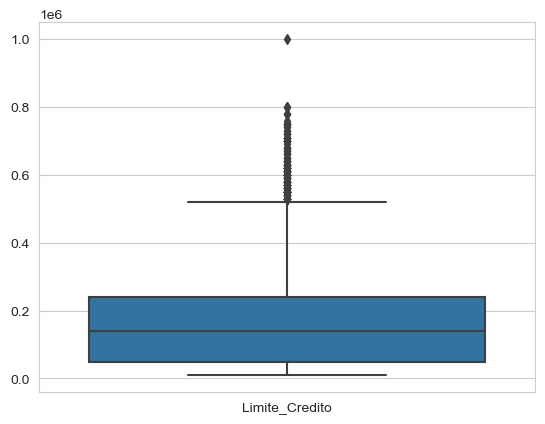

In [13]:
sns.set_style("whitegrid")
sns.boxplot(data=df[["Limite_Credito"]], orient='v')

<AxesSubplot:>

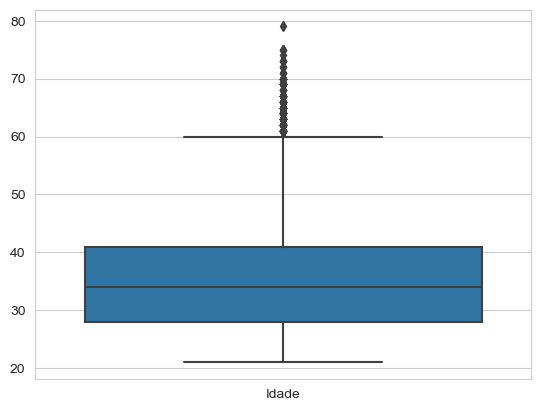

In [14]:
sns.set_style("whitegrid")
sns.boxplot(data=df[["Idade"]], orient='v')

Optei por não remover os pontos que talvez possam ser identificados como outliers, pois, não é possivel determinar se esses dados foram apenas preenchidos incorretamente ou se existem. Se avaliarmos bem, eles podem ser considerados, em alguns casos, pouco comuns, mas não quer dizer que não existam. Para o caso de uma modelagem posterior, podemos avaliar a inlfuência dessas observações em um modelo de previsão.

## Análise exploratória

Essa análise inicial consiste em buscar compreender o comportamento dos dados e buscar relações, através de algumas visualizações gráficas. 

### Variáveis categóricas

Para facilitar a visualização gráfica dos dados, irei renomear as categorias das variáveis categóricas que já estão definidas. 

In [15]:
df['Status Pagamento'] = df['Status Pagamento'].replace({1: 'Inadimplente', 0: 'Adimplente'})
df['Sexo'] = df['Sexo'].replace({1: 'Masculino', 2: 'Feminino'})
df['Escolaridade'] = df['Escolaridade'].replace({1: 'Pós-graduação', 2: 'Graduação', 3: 'Ensino médio', 4: 'Outros'})
df['Est_Civil'] = df['Est_Civil'].replace({1: 'Casado', 2: 'Solteiro', 3: 'Outros'})

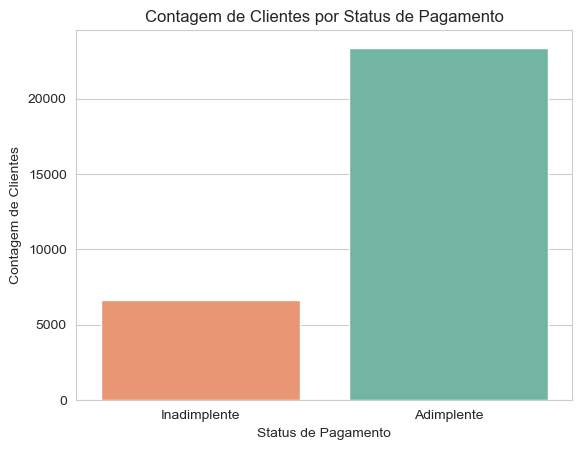

In [16]:
# Criação do gráfico de barras empilhadas utilizando a biblioteca Seaborn
new_palette = sns.color_palette(["#fc8d62", "#66c2a5", "#8da0cb", "#e78ac3"], desat = 1)

sns.set_palette(new_palette)
sns.set_style('whitegrid')
sns.countplot(x="Status Pagamento", data=df)

# Configurações de legenda 
plt.xlabel('Status de Pagamento')
plt.ylabel('Contagem de Clientes')
plt.title('Contagem de Clientes por Status de Pagamento')

# Exibição do gráfico
plt.show()

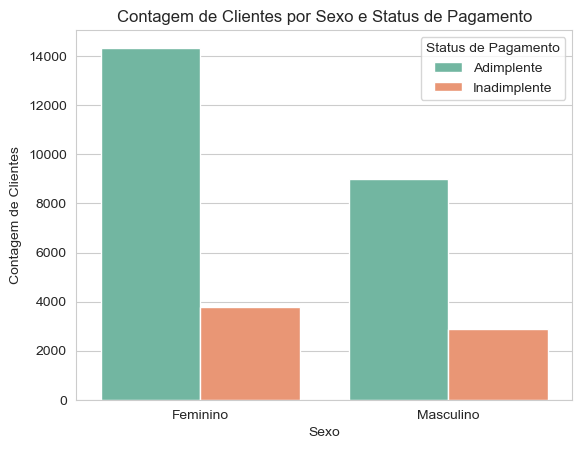

In [17]:
# Calcular a contagem de valores em cada categoria
counts = df.groupby(['Status Pagamento', 'Sexo']).size().reset_index(name='Contagem de Clientes')

# Criação do gráfico de barras empilhadas utilizando a biblioteca Seaborn
new_palette = sns.color_palette(["#66c2a5","#fc8d62", "#8da0cb", "#e78ac3"], desat = 1)

sns.set_palette(new_palette)
sns.set_style('whitegrid')
sns.barplot(data=counts, x='Sexo', y='Contagem de Clientes', hue='Status Pagamento')

# Configurações de legenda
plt.xlabel('Sexo')
plt.ylabel('Contagem de Clientes')
plt.legend(title='Status de Pagamento')
plt.title('Contagem de Clientes por Sexo e Status de Pagamento')

# Exibição do gráfico
plt.show()

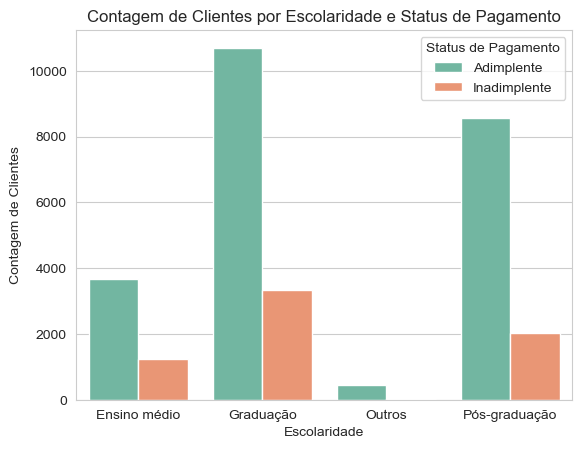

In [18]:
# Calcular a contagem de valores em cada categoria
counts = df.groupby(['Status Pagamento', 'Escolaridade']).size().reset_index(name='Contagem de Clientes')

# Criação do gráfico de barras empilhadas utilizando a biblioteca Seaborn
sns.set_palette(new_palette)
sns.set_style('whitegrid')
sns.barplot(data=counts, x='Escolaridade', y='Contagem de Clientes', hue='Status Pagamento')

# Configurações de legenda 
plt.xlabel('Escolaridade')
plt.ylabel('Contagem de Clientes')
plt.legend(title='Status de Pagamento')
plt.title('Contagem de Clientes por Escolaridade e Status de Pagamento')

# Exibição do gráfico
plt.show()

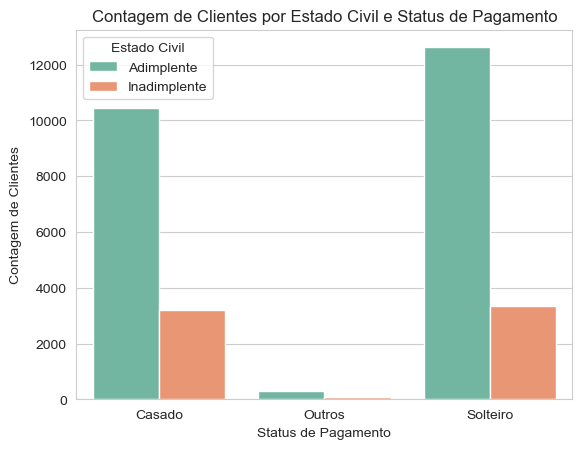

In [19]:
# Calcular a contagem de valores em cada categoria
counts = df.groupby(['Status Pagamento', 'Est_Civil']).size().reset_index(name='Contagem de Clientes')

# Criação do gráfico de barras empilhadas utilizando a biblioteca Seaborn
sns.set_palette(new_palette)
sns.set_style('whitegrid')
sns.barplot(data=counts, x='Est_Civil', y='Contagem de Clientes', hue='Status Pagamento')

# Configurações de legenda 
plt.xlabel('Status de Pagamento')
plt.ylabel('Contagem de Clientes')
plt.legend(title='Estado Civil')
plt.title('Contagem de Clientes por Estado Civil e Status de Pagamento')

# Exibição do gráfico
plt.show()

A quantidade de clienteS inadimplentes é de aproximadamente 22% do total de clientes, quando visualizamos as variáveis *Sexo*, *Escolaridade* e *Estado Civil* em relação a variável *Status Pagamento*, podemos suspeitar que pessoas do sexo masculino, escolariadde ensino médio e estado civil casado, apresentam uma maior proporção de inadimplência em relação aos demais grupos de cada variável individualmente.

Para poder visualizar melhor a variável *limite de crédito* criei as seguintes categorias para essas variáveis.

Silver - Limite de crédito $< NT\$ 50000$

Gold - $ NT\$ 50000 \geq$ Limite de crédito $ < NT\$ 250000 $

Platinum - $ NT\$ 250000 \geq $ Limite de crédito $ < NT\$500000$

Black - Limite de crédito $ \geq NT\$ 500000 $

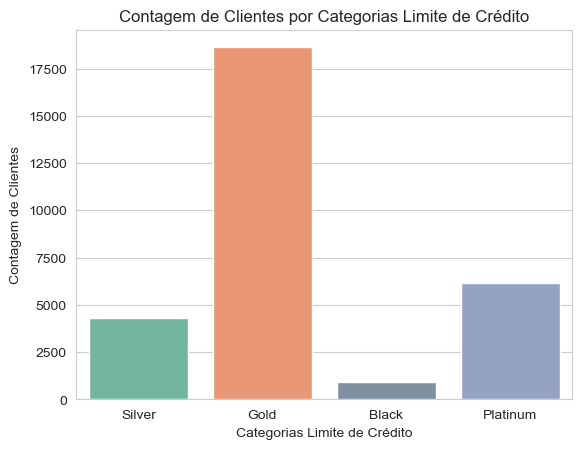

In [20]:
# função que classifica os valores da coluna 'Limite_Credito'
def categorias_credito(valor):
    if valor < 50000:
        return 'Silver'
    elif valor < 250000:
        return 'Gold'
    elif valor < 500000:
        return 'Platinum'
    else:
        return 'Black'

# criar uma nova coluna 'Categorias_credito'
df['Categorias_credito'] = df['Limite_Credito'].apply(categorias_credito)

# criando o dicionário de mapeamento de categorias para valores numéricos
mapeamento = {'Silver': 1, 'Gold': 2, 'Platinum': 3, 'Black': 4}

# aplicando o mapeamento à coluna 'Categorias_credito'
df['Categorias_credito'] = df['Categorias_credito'].map(mapeamento)

# renomeando as categorias
df['Categorias_credito'] = df['Categorias_credito'].replace({1:'Silver', 2:'Gold', 3:'Platinum', 4:'Black'})

# Criação do gráfico de barras empilhadas utilizando a biblioteca Seaborn
new_palette = sns.color_palette(["#66c2a5", "#fc8d62", "#7890A8" ,"#8da0cb"], desat = 1)

sns.set_palette(new_palette)

sns.set_style('whitegrid')
sns.countplot(x="Categorias_credito", data=df)

# Configurações de legenda e título
plt.xlabel('Categorias Limite de Crédito')
plt.ylabel('Contagem de Clientes')
plt.title('Contagem de Clientes por Categorias Limite de Crédito')

# Exibição do gráfico
plt.show()

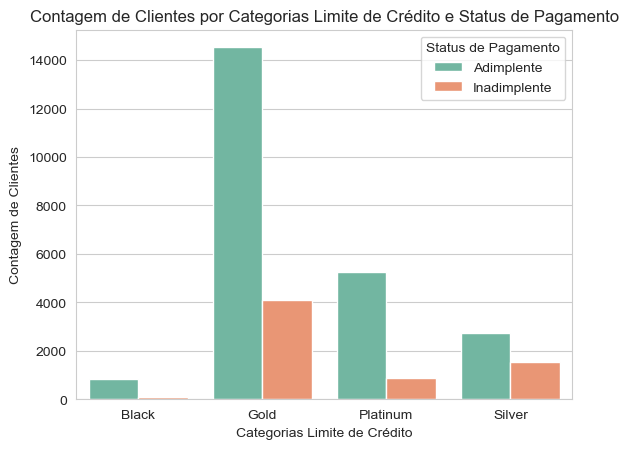

In [21]:
# Calcular a contagem de valores em cada categoria
counts = df.groupby(['Status Pagamento', 'Categorias_credito']).size().reset_index(name='Contagem de Clientes')

# Criação do gráfico de barras empilhadas utilizando a biblioteca Seaborn
new_palette = sns.color_palette(["#66c2a5","#fc8d62", "#8da0cb", "#e78ac3"], desat = 1)

sns.set_palette(new_palette)
sns.set_style('whitegrid')
sns.barplot(data=counts, x='Categorias_credito', y='Contagem de Clientes', hue='Status Pagamento')

# Configurações de legenda e título
plt.xlabel('Categorias Limite de Crédito')
plt.ylabel('Contagem de Clientes')
plt.legend(title='Status de Pagamento')
plt.title('Contagem de Clientes por Categorias Limite de Crédito e Status de Pagamento')

# Exibição do gráfico
plt.show()

Observe que a categoria *Silver* que é a terceira categoria com maior quantidade de clientes a que possui maior proporção de clientes com inadimplência. A categoria *Gold* é a que possui maior número de clientes, e consequentemente é a que concentra maiores quantidades de cliente de ambas as categorias, porém com uma proporção de inadimplência menor, comparada com a categoria *silver*.

A seguir criei cinco faixas etárias para a variável *Idade*.

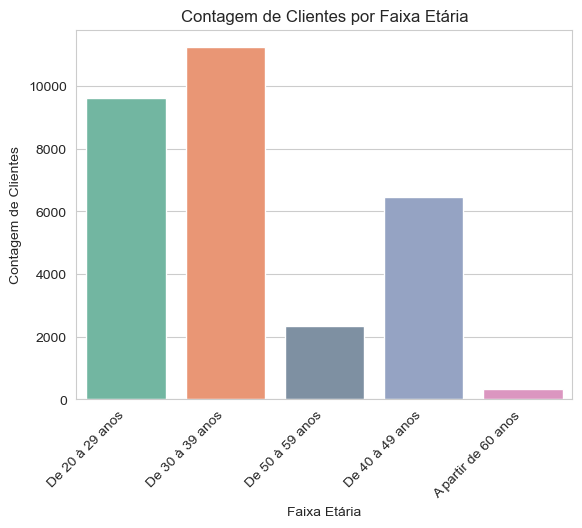

In [22]:
# função que classifica os valores da coluna 'Idade'
def faixa_etaria(valor):
    if valor < 30:
        return 'De 20 à 29 anos'
    elif valor < 40:
        return 'De 30 à 39 anos'
    elif valor < 50:
        return 'De 40 à 49 anos'
    elif valor < 60:
        return 'De 50 à 59 anos'
    else:
        return 'A partir de 60 anos'

# criar uma nova coluna 'faixa_etaria'
df['faixa_etaria'] = df['Idade'].apply(faixa_etaria)

# criando o dicionário de mapeamento de categorias para valores numéricos
mapeamento = {'De 20 à 29 anos': 1, 'De 30 à 39 anos': 2, 'De 40 à 49 anos': 3,
              'De 50 à 59 anos': 4, 'A partir de 60 anos': 5}

# aplicando o mapeamento à coluna 'faixa etária'
df['faixa_etaria'] = df['faixa_etaria'].map(mapeamento)

# renomeando as categorias
df['faixa_etaria'] = df['faixa_etaria'].replace({1:'De 20 à 29 anos', 2:'De 30 à 39 anos', 3:'De 40 à 49 anos',
                                                             4:'De 50 à 59 anos', 5:'A partir de 60 anos'})
# Criação do gráfico de barras empilhadas utilizando a biblioteca Seaborn
new_palette = sns.color_palette([ "#66c2a5","#fc8d62","#7890A8", "#8da0cb", '#e78ac3'], desat = 1)

sns.set_palette(new_palette)
sns.set_style('whitegrid')
sns.countplot(x="faixa_etaria", data=df)

# Configurações de legenda e título
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem de Clientes')
plt.title('Contagem de Clientes por Faixa Etária')

# Ajuste das labels do eixo X
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Exibição do gráfico
plt.show()

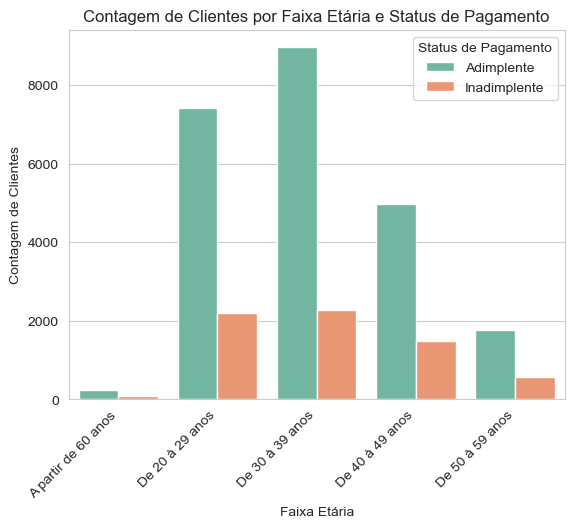

In [23]:
# Calcular a contagem de valores em cada categoria
counts = df.groupby(['Status Pagamento', 'faixa_etaria']).size().reset_index(name='Contagem de Clientes')

# Criação do gráfico de barras empilhadas utilizando a biblioteca Seaborn
sns.set_palette(new_palette)
sns.set_style('whitegrid')
sns.barplot(data=counts, x='faixa_etaria', y='Contagem de Clientes', hue='Status Pagamento')

# Configurações de legenda e título
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem de Clientes')
plt.legend(title='Status de Pagamento')
plt.title('Contagem de Clientes por Faixa Etária e Status de Pagamento')

# Ajuste das labels do eixo X
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Exibição do gráfico
plt.show()

A proporção de clientes inadimplentes parace ser maior a partir da faixa de 40 à 49 anos.

Mas, será que essas diferenças que visualizamos são significativas do ponto de vista estatístico? Veremos isso a seguir com testes estatísticos.

Do ponto de vista do negócio, deseja-se a partir dessa análise exploratória avaliar se atributos, como, sexo, escolaridade, estado civil e categoria de limite de crédito e idade estão de algumas forma associadas a inadimplência de cartão de crédito. Portanto desejamos testar as seguintes hipóteses:

$H_0$ (Hipótese nula): Não existe associação entre os atributos preditivos (sexo, escolaridade, estado civil, categoria de limite de crédito e idade) e a inadimplência de clientes, que é equivalente dizer que a variável *Status Pagamento* é independente das variáveis categóricas explicativas.

$H_1$ (Hipótese alternativa): É de que existe associação entre os atributos (sexo, escolaridade, estado civil, categoria de limite de crédito e idade) e o Status de Pagamento, ou seja, elas são dependentes.

## Teste qui-quadrado

O teste qui-quadrado pode avaliar se existe associação entre as variáveis, mas não pode determinar o grau de associação, no caso de existir associação entre as variáveis, essa associação pode ser medida pela razão de possibilidades, mais conhecida por razão de chaces ou *odds ratio*.

A seguir os testes para cada uma das variáveis categóricas preditivas. O nível de significância considerado é de 5% ($ \alpha = 0.05 $)

In [24]:
from scipy.stats import chi2_contingency

# Cria uma tabela de contingência entre as variáveis sexo e inadimplência
contingency_table = pd.crosstab(df['Sexo'], df['Status Pagamento'])

# Aplica o teste qui-quadrado
stat, p, dof, expected = chi2_contingency(contingency_table)

# Imprime os resultados do teste
print(f"Qui-quadrado: {stat}")
print(f"P-valor: {p}")
print(f"Graus de liberdade: {dof}")
print("Expected values:") 
print(expected)
contingency_table

Qui-quadrado: 47.708796890621116
P-valor: 4.944678999412026e-12
Graus de liberdade: 1
Expected values:
[[14105.6256  4006.3744]
 [ 9258.3744  2629.6256]]


Status Pagamento,Adimplente,Inadimplente
Sexo,,
Feminino,14349,3763
Masculino,9015,2873


In [25]:
contingency_table = pd.crosstab(df['Escolaridade'], df['Status Pagamento'])

# Aplica o teste qui-quadrado
stat, p, dof, expected = chi2_contingency(contingency_table)

# Imprime os resultados do teste
print(f"Qui-quadrado: {stat}")
print(f"P-valor: {p}")
print(f"Graus de liberdade: {dof}")
print("Expected values:")
print(expected)
contingency_table

Qui-quadrado: 160.40995107224546
P-valor: 1.4950645648106153e-34
Graus de liberdade: 3
Expected values:
[[ 3829.3596  1087.6404]
 [10926.564   3103.436 ]
 [  364.4784   103.5216]
 [ 8243.598   2341.402 ]]


Status Pagamento,Adimplente,Inadimplente
Escolaridade,,
Ensino médio,3680,1237
Graduação,10700,3330
Outros,435,33
Pós-graduação,8549,2036


In [26]:
contingency_table = pd.crosstab(df['Est_Civil'], df['Status Pagamento'])

# Aplica o teste qui-quadrado
stat, p, dof, expected = chi2_contingency(contingency_table)

# Imprime os resultados do teste
print(f"Qui-quadrado: {stat}")
print(f"P-valor: {p}")
print(f"Graus de liberdade: {dof}")
print("Expected values:")
print(expected)
contingency_table

Qui-quadrado: 28.13032464482199
P-valor: 7.790720364202813e-07
Graus de liberdade: 2
Expected values:
[[10637.6292  3021.3708]
 [  293.6076    83.3924]
 [12432.7632  3531.2368]]


Status Pagamento,Adimplente,Inadimplente
Est_Civil,,
Casado,10453,3206
Outros,288,89
Solteiro,12623,3341


In [27]:
contingency_table = pd.crosstab(df['Categorias_credito'], df['Status Pagamento'])

# Aplica o teste qui-quadrado
stat, p, dof, expected = chi2_contingency(contingency_table)

# Imprime os resultados do teste
print(f"Qui-quadrado: {stat}")
print(f"P-valor: {p}")
print(f"Graus de liberdade: {dof}")
print("Expected values:") 
print(expected)
contingency_table

Qui-quadrado: 763.7881018002082
P-valor: 3.086846414235927e-165
Graus de liberdade: 3
Expected values:
[[  722.7264   205.2736]
 [14502.8136  4119.1864]
 [ 4781.0532  1357.9468]
 [ 3357.4068   953.5932]]


Status Pagamento,Adimplente,Inadimplente
Categorias_credito,,
Black,824,104
Gold,14529,4093
Platinum,5255,884
Silver,2756,1555


In [28]:
contingency_table = pd.crosstab(df['faixa_etaria'], df['Status Pagamento'])

# Aplica o teste qui-quadrado
stat, p, dof, expected = chi2_contingency(contingency_table)

# Imprime os resultados do teste
print(f"Qui-quadrado: {stat}")
print(f"P-valor: {p}")
print(f"Graus de liberdade: {dof}")
print("Expected values:") 
print(expected)
contingency_table

Qui-quadrado: 46.16525003256573
P-valor: 2.2753444498438286e-09
Graus de liberdade: 4
Expected values:
[[ 264.0132   74.9868]
 [7490.4984 2127.5016]
 [8752.1544 2485.8456]
 [5034.1632 1429.8368]
 [1823.1708  517.8292]]


Status Pagamento,Adimplente,Inadimplente
faixa_etaria,,
A partir de 60 anos,243,96
De 20 à 29 anos,7421,2197
De 30 à 39 anos,8962,2276
De 40 à 49 anos,4979,1485
De 50 à 59 anos,1759,582


**Conclusão do teste qui-quadrado:** A hipótese de associação entre as variáveis foi aceita para todas as variáveis preditivas avaliadas, ou seja, o sexo, a escolaridade, o estado civil, a categoria de limite de crédito e a faixa etária estão associadas ao status de pagamento. A seguir é obtida a razão de chances para cada uma das variáveis. Lembrando que quando duas variáveis estão associadas isso não quer dizer necessariamente que exista uma relação de causa e efeito, apenas algum grau de associação.

## Razão de Chances

A razão de chances pode ser definida como a razão entre a chance de um determinado evento acontecer em um grupo 1 (G1) e a chance desse mesmo evento acontecer no grupo 2 (G2). A chance é obtida pela a razão entre a probabilidade de ocorrência de um determinado evento de interesse e a probabilidade desse evento não acontecer. Para ilustrar utilizei a variável *sexo*, como exemplo:

Considere o G1 (Masculino) e G2 (Feminino) qual a chance de inadimplência para ambos os grupos? Da tabela de contigência anterior, temos o seguinte:

$ ChanceF = \frac{3762}{14349} $ e $ ChanceM = \frac{2873}{9017} $

Temos a chance para cada um dos grupos, neste caso, basta dividir uma pela a outra e obtemos a razão de chances. Neste caso, suspeitamos que clientes do sexo masculino tenham maior chance de inadimplência se comparado com cliente do sexo feminino, então, o sexo feminino será nossa variável de referência, o cálculo fica da seguinte maneira:

$ OR (odds \hspace{0.2cm} ratio) = \frac{ChanceM}{ChanceF} = 1.21$

A seguir são obtidas as razões de chances para as variáveis a partir da tabela de contigência.

**Razão de chance de inadimplência entre cliente do sexo masculino em relação a clientes do sexo feminino**

In [29]:
contingency_table = pd.crosstab(df['Sexo'], df['Status Pagamento'])

chanceM = contingency_table.loc['Masculino', 'Inadimplente'] / contingency_table.loc['Masculino', 'Adimplente']
chanceF = contingency_table.loc['Feminino', 'Inadimplente'] / contingency_table.loc['Feminino', 'Adimplente']
OR = chanceM/chanceF
print('Razão de Chances Masculino e Feminino: {}'.format(OR))

Razão de Chances Masculino e Feminino: 1.215226725941307


Uma razão de chance de 1.21, significa que clientes do sexo masculino possuem 21% mais chance de ficarem inadimplentes em relação os clientes do sexo feminino.

**Razão de chance de inadimplência entre os níveis de escolaridade, tendo como referência clientes com pós-graduação**

In [30]:
contingency_table = pd.crosstab(df['Escolaridade'], df['Status Pagamento'])

chanceE = contingency_table.loc['Ensino médio', 'Inadimplente'] / contingency_table.loc['Ensino médio', 'Adimplente']
chanceG = contingency_table.loc['Graduação', 'Inadimplente'] / contingency_table.loc['Graduação', 'Adimplente']
chanceO = contingency_table.loc['Outros', 'Inadimplente'] / contingency_table.loc['Outros', 'Adimplente']
chanceP = contingency_table.loc['Pós-graduação', 'Inadimplente'] / contingency_table.loc['Pós-graduação', 'Adimplente']
OR_Med = chanceE/chanceP
OR_Grad = chanceG/chanceP
OR_Outros = chanceO/chanceP                   
print('Razão de Chances Ensino médio e Pós-graduação: {}'.format(OR_Med))
print('Razão de Chances Graduação e Pós-graduação: {}'.format(OR_Grad))
print('Razão de Chances Outros e Pós-graduação: {}'.format(OR_Outros))                                          

Razão de Chances Ensino médio e Pós-graduação: 1.4114302607414366
Razão de Chances Graduação e Pós-graduação: 1.3067665203899896
Razão de Chances Outros e Pós-graduação: 0.3185387168890996


Cliente com ensino médio e graduação possuem, respectivamente, 41% e 31% mais chance de inadimplência em relação a clientes com pós-graduação. Clientes que não possui nem ensino médio, nem graduação tem 69% menos chance de ficar inadimplente em relação a pós-graduados.

**Razão de chance de inadimplência entre estado civil, tendo como referência clientes casados**

In [31]:
contingency_table = pd.crosstab(df['Est_Civil'], df['Status Pagamento'])

chanceC = contingency_table.loc['Casado', 'Inadimplente'] / contingency_table.loc['Casado', 'Adimplente']
chanceO = contingency_table.loc['Outros', 'Inadimplente'] / contingency_table.loc['Outros', 'Adimplente']
chanceS = contingency_table.loc['Solteiro', 'Inadimplente'] / contingency_table.loc['Solteiro', 'Adimplente']
OR_Outros = chanceO/chanceC
OR_Solteiro = chanceS/chanceC  
print('Razão de Chances Outros e Casado: {}'.format(OR_Outros))
print('Razão de Chances Solteiro e Casado: {}'.format(OR_Solteiro))

Razão de Chances Outros e Casado: 1.0075693578013447
Razão de Chances Solteiro e Casado: 0.8629613115984255


Clientes com estado civil não definido (outros) e casados, não possui nenhuma associação. Já os clientes solteiros possui 14% menos chances de ficar inadimplente se comprarado com cliente casados. Conforme suspeitava-se clientes casados tem maior chance de inadimplência que os clientes solteiros.

**Razão de chance de inadimplência entre categorias de credito, tendo como referência clientes Black**

In [32]:
contingency_table = pd.crosstab(df['Categorias_credito'], df['Status Pagamento'])

chanceS = contingency_table.loc['Silver', 'Inadimplente'] / contingency_table.loc['Silver', 'Adimplente']
chanceG = contingency_table.loc['Gold', 'Inadimplente'] / contingency_table.loc['Gold', 'Adimplente']
chanceP = contingency_table.loc['Platinum', 'Inadimplente'] / contingency_table.loc['Platinum', 'Adimplente']
chanceB = contingency_table.loc['Black', 'Inadimplente'] / contingency_table.loc['Black', 'Adimplente']
OR_Gold = chanceG/chanceB
OR_Platinum = chanceP/chanceB
OR_Silver = chanceS/chanceB
print('Razão de Chances entre Gold e Black: {}'.format(OR_Gold))
print('Razão de Chances entre Platinum e Black: {}'.format(OR_Platinum))
print('Razão de Chances entre Silver e Black: {}'.format(OR_Silver))

Razão de Chances entre Gold e Black: 2.232029310080105
Razão de Chances entre Platinum e Black: 1.3328258801141768
Razão de Chances entre Silver e Black: 4.470386290052473


A interpretação segue a mesma lógica usada nas interpretações anteriores. Pode-se observar que os clientes que tendem a ter maior inadimplência estão na categoria Silver.

**Razão de chance de inadimplência entre faixa etária, tendo como referência clientes de 30 à 39 anos**

In [33]:
contingency_table = pd.crosstab(df['faixa_etaria'], df['Status Pagamento'])

chance1 = contingency_table.loc['A partir de 60 anos','Inadimplente']/contingency_table.loc['A partir de 60 anos', 'Adimplente']
chance2 = contingency_table.loc['De 20 à 29 anos', 'Inadimplente'] / contingency_table.loc['De 20 à 29 anos', 'Adimplente']
chance3 = contingency_table.loc['De 30 à 39 anos', 'Inadimplente'] / contingency_table.loc['De 30 à 39 anos', 'Adimplente']
chance4 = contingency_table.loc['De 40 à 49 anos', 'Inadimplente'] / contingency_table.loc['De 40 à 49 anos', 'Adimplente']
chance5 = contingency_table.loc['De 50 à 59 anos', 'Inadimplente'] / contingency_table.loc['De 50 à 59 anos', 'Adimplente']
OR_4 = chance4/chance3
OR_5 = chance5/chance3
OR_1 = chance1/chance3
OR_2 = chance2/chance3
print('Razão de Chances De 40 à 49 anos e De 30 à 39 anos: {}'.format(OR_4))
print('Razão de Chances De 50 à 59 anos e De 30 à 39 anos: {}'.format(OR_5))
print('Razão de Chances A partir de 60 anos e De 30 à 39 anos: {}'.format(OR_1))
print('Razão de Chances De 20 à 29 anos e De 30 à 39 anos: {}'.format(OR_2))

Razão de Chances De 40 à 49 anos e De 30 à 39 anos: 1.174402614001654
Razão de Chances De 50 à 59 anos e De 30 à 39 anos: 1.30283622964398
Razão de Chances A partir de 60 anos e De 30 à 39 anos: 1.5555989498578835
Razão de Chances De 20 à 29 anos e De 30 à 39 anos: 1.1657362649906489


Observe que razão de chance inferior a 1, significa que o grupo em questão tem menos chance do que o grupo utilizado como referência. [Neste link](https://rpubs.com/fagna/1040245) poderá ser visualizada a análise feita em R, com os respectivos intervalos de confiânça.

Na análise em R, inverti as faixas etárias para que a interpretação ficasse mais fácil, neste caso, cliente com idade entre 30 e 39 anos possui menos chance de inadimplência se comparado com os demais, e foi a categoria utilizada como referência. Utilizei também o Power BI para visualizar os dados e obter insights, [acesse o visual neste link](https://app.powerbi.com/view?r=eyJrIjoiMzNlYTA0YmUtMDRiOC00NWU4LWE0MDAtMGIxYjc5ZDdjNDEyIiwidCI6ImVmODAxNDBiLTE1MGQtNDY0Yy04ZGY4LTUwZGNjMmMyMzk2YyJ9).


Retornando as variáveis para o tipo númerico.

In [34]:
df['Status Pagamento'] = df['Status Pagamento'].replace({'Inadimplente':1 , 'Adimplente':0})
df['Sexo'] = df['Sexo'].replace({'Masculino':1, 'Feminino':2})
df['Escolaridade'] = df['Escolaridade'].replace({'Pós-graduação':1,'Graduação':2,'Ensino médio':3,'Outros':4})
df['Est_Civil'] = df['Est_Civil'].replace({'Casado':1, 'Solteiro':2, 'Outros':3})

## Modelagem 

O modelo apresentado utiliza as variáveis originais. Portanto, utilizei as variáveis *limite de crédito* e *idade* ao invés de usar as categorias ou faixa etária criadas.

Para este caso, a ideia é obter um modelo capaz de prever a probabilidade de o cliente ficar inadimplente no próximo mês, ao invés da classificação em si. Como uma única metrica de avaliação de modelo em muitas situações não é suficiente para tomar a melhor decisão, varias métricas foram utilizadas neste caso. 

Do ponto de vista do negócio, imagine que a empresa deseja enviar uma mensagem para os clientes que tiverem maior probabilidade de inadimplência (ou assim sejam classificados), com intuito de incentivar o pagamento da fatura até o vencimento. O que seria péssimo para empresa neste caso seria o modelo prever que o cliente o status de pagamento será adimplente, quando na verdade será inadimplente, ou seja, o modelo prever que o cliente vai pagar quando na verdade ele não vai, e neste caso a empresa deixou de enviar um incentivo para aquele cliente. Então, considerando esse contexto, desejamos então o menor número possível de *falsos negativos (FN)* ao mesmo tempo que queremos o modelo com a maior probabilidade de acerto na classe positiva. 


## Divisão previsões e classe

In [35]:
X_df = df.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]].values 
X_df

array([[ 20000,      2,      2, ...,      0,      0,      0],
       [120000,      2,      2, ...,   1000,      0,   2000],
       [ 90000,      2,      2, ...,   1000,   1000,   5000],
       ...,
       [ 30000,      1,      2, ...,   4200,   2000,   3100],
       [ 80000,      1,      3, ...,   1926,  52964,   1804],
       [ 50000,      1,      2, ...,   1000,   1000,   1000]], dtype=int64)

In [36]:
y_df = df.iloc[:, 23].values
y_df

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

## Escalonamento de variáveis

In [37]:
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
X_df = scaler_census.fit_transform(X_df)
X_df[0]

array([-1.13672015,  0.81016074,  0.21186989, -1.06879721, -1.24601985,
        1.79456386,  1.78234817, -0.69666346, -0.66659873, -1.53004603,
       -1.48604076, -0.64250107, -0.64739923, -0.66799331, -0.67249727,
       -0.66305853, -0.65272422, -0.34194162, -0.22708564, -0.29680127,
       -0.30806256, -0.31413612, -0.29338206])

## Divisão entre treinamento e teste

In [38]:
from sklearn.model_selection import train_test_split
seed=1336
np.random.seed(seed)
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.30, stratify = y_df)

In [39]:
X_train.shape, y_train.shape

((21000, 23), (21000,))

In [40]:
X_test.shape, y_test.shape

((9000, 23), (9000,))

## Modelos de Machine Learning 

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

Observe que utilizo tanto o *predict* - capacidade do modelo de distinguir entre ambas as classes, quanto o *predict_proba* - capacidade de classificar corretamente a classe positiva, e para ambos avalio usando a *Area Under the Curve* (AUC).

### Random Forest

In [42]:
def run_random_forest(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=10, min_samples_split=5, 
                                min_samples_leaf=8, max_features=9)
    rf.fit(X_train, y_train) #treinando o modelo
    score = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
    print('Resultado Fase de Treinamento')
    print("Pontações da validação cruzada (acurácia) {}".format(score))
    print("Média das pontuação da validação cruzada (acurácia):{}".format(score.mean()))
    
    pred_proba_train = rf.predict_proba(X_train)[:, 1] # Probabilidade da classe positiva para os dados de treino
    print('\nAUC probabilidade (Random Forest) - Treino: {}'.format(roc_auc_score(y_train, pred_proba_train)))
    pred_class_train = rf.predict(X_train) # previsão classe positiva para os dados de treino 
    print('\nAUC previsão (Random Forest) - Treino: {}'.format(roc_auc_score(y_train, pred_class_train)))
    print('Classificação report do Random Forest (Treino):\n {}'.format(classification_report(y_train, pred_class_train)))
    
    print('Resultado Fase de Teste')
    pred_proba_test = rf.predict_proba(X_test)[:, 1] # Probabilidade da classe positiva para os dados de teste
    print('\nAUC probabilidade (Random Forest) - Teste: {}'.format(roc_auc_score(y_test, pred_proba_test)))
    pred_class_test = rf.predict(X_test) # previsão classe positiva para os dados de teste
    print('\nAUC previsão (Random Forest) - Teste: {}'.format(roc_auc_score(y_test, pred_class_test)))
    print('Matriz de confusão AUC (Random Forest) - Teste:\n{}'.format(confusion_matrix(y_test, pred_class_test)))
    print('Classificação report do Random Forest (Teste):\n {}'.format(classification_report(y_test, pred_class_test)))
    return pred_proba_train, pred_class_train, pred_proba_test, pred_class_test

pred_proba_train, pred_class_train, pred_proba_test, pred_class_test = run_random_forest(X_train,X_test,y_train, y_test)

Resultado Fase de Treinamento
Pontações da validação cruzada (acurácia) [0.81404762 0.82428571 0.82166667 0.82261905 0.815     ]
Média das pontuação da validação cruzada (acurácia):0.8195238095238097

AUC probabilidade (Random Forest) - Treino: 0.850542481322145

AUC previsão (Random Forest) - Treino: 0.6959816819958411
Classificação report do Random Forest (Treino):
               precision    recall  f1-score   support

           0       0.86      0.97      0.91     16355
           1       0.78      0.43      0.55      4645

    accuracy                           0.85     21000
   macro avg       0.82      0.70      0.73     21000
weighted avg       0.84      0.85      0.83     21000

Resultado Fase de Teste

AUC probabilidade (Random Forest) - Teste: 0.7861746456572052

AUC previsão (Random Forest) - Teste: 0.6570898046774761
Matriz de confusão AUC (Random Forest) - Teste:
[[6687  322]
 [1274  717]]
Classificação report do Random Forest (Teste):
               precision    recall 

### Regressão Logística

In [43]:
def run_Reg_log(X_train, X_test, y_train, y_test):
    rl = LogisticRegression(random_state=0)
    rl.fit(X_train, y_train) #treinando o modelo
    score = cross_val_score(rl, X_train, y_train, cv=5, scoring='accuracy')
    print('Resultado Fase de Treinamento')
    print("Pontações da validação cruzada (acurácia) {}".format(score))
    print("Média das pontuação da validação cruzada (acurácia):{}".format(score.mean()))
    
    pred_proba_train = rl.predict_proba(X_train)[:, 1] # Probabilidade da classe positiva para os dados de treino
    print('\nAUC probabilidade (Regressão Logística) - Treino: {}'.format(roc_auc_score(y_train, pred_proba_train)))
    pred_class_train = rl.predict(X_train) # previsão classe positiva para os dados de treino 
    print('\nAUC previsão (Regressão Logística) - Treino: {}'.format(roc_auc_score(y_train, pred_class_train)))
    print('Classificação report do Regressão Logística (Treino):\n {}'.format(classification_report(y_train, pred_class_train)))
    
    print('Resultado Fase de Teste')
    pred_proba_test = rl.predict_proba(X_test)[:, 1] # Probabilidade da classe positiva para os dados de teste
    print('\nAUC probabilidade (Regressão Logística) - Teste: {}'.format(roc_auc_score(y_test, pred_proba_test)))
    pred_class_test = rl.predict(X_test) # previsão classe positiva para os dados de teste
    print('\nAUC previsão (Regressão Logística) - Teste: {}'.format(roc_auc_score(y_test, pred_class_test)))
    print('Matriz de confusão AUC (Regressão Logística) - Teste:\n{}'.format(confusion_matrix(y_test, pred_class_test)))
    print('Classificação report do Regressão Logística (Teste):\n {}'.format(classification_report(y_test, pred_class_test)))
    return pred_proba_train, pred_class_train, pred_proba_test, pred_class_test

pred_proba_train, pred_class_train, pred_proba_test, pred_class_test = run_Reg_log(X_train,X_test, y_train, y_test)

Resultado Fase de Treinamento
Pontações da validação cruzada (acurácia) [0.80952381 0.81238095 0.81119048 0.80880952 0.80785714]
Média das pontuação da validação cruzada (acurácia):0.809952380952381

AUC probabilidade (Regressão Logística) - Treino: 0.7213714414338221

AUC previsão (Regressão Logística) - Treino: 0.6016425784341568
Classificação report do Regressão Logística (Treino):
               precision    recall  f1-score   support

           0       0.82      0.98      0.89     16355
           1       0.72      0.23      0.35      4645

    accuracy                           0.81     21000
   macro avg       0.77      0.60      0.62     21000
weighted avg       0.80      0.81      0.77     21000

Resultado Fase de Teste

AUC probabilidade (Regressão Logística) - Teste: 0.7303136979870681

AUC previsão (Regressão Logística) - Teste: 0.6021798478371676
Matriz de confusão AUC (Regressão Logística) - Teste:
[[6822  187]
 [1531  460]]
Classificação report do Regressão Logística (T

### XGBoost

In [44]:
def run_XGBoost(X_train, X_test, y_train, y_test):
    xgboost = xgb.XGBClassifier(random_state=0, max_depth=10, learning_rate=0.01, subsample=0.8, colsample_bytree=0.8, 
                                reg_alpha=1, reg_lambda=1)
    xgboost.fit(X_train, y_train)
    score = cross_val_score(xgboost, X_train, y_train, cv=5, scoring='accuracy')
    print('Resultado Fase de Treinamento')
    print("Pontações da validação cruzada (acurácia) {}".format(score))
    print("Média das pontuação da validação cruzada (acurácia):{}".format(score.mean()))
    
    pred_proba_train = xgboost.predict_proba(X_train)[:, 1] # Probabilidade da classe positiva para os dados de treino
    print('\nAUC probabilidade (XGBoost) - Treino: {}'.format(roc_auc_score(y_train, pred_proba_train)))
    pred_class_train = xgboost.predict(X_train) # previsão classe positiva para os dados de treino 
    print('\nAUC previsão (XGBoost) - Treino: {}'.format(roc_auc_score(y_train, pred_class_train)))
    print('Classificação report do XGBoost (Treino):\n {}'.format(classification_report(y_train, pred_class_train)))
    
    print('Resultado Fase de Teste')
    pred_proba_test = xgboost.predict_proba(X_test)[:, 1] # Probabilidade da classe positiva para os dados de teste
    print('\nAUC probabilidade (XGBoost) - Teste: {}'.format(roc_auc_score(y_test, pred_proba_test)))
    pred_class_test = xgboost.predict(X_test) # previsão classe positiva para os dados de teste
    print('\nAUC previsão (XGBoost) - Teste: {}'.format(roc_auc_score(y_test, pred_class_test)))
    print('Matriz de confusão AUC (XGBoost) - Teste:\n{}'.format(confusion_matrix(y_test, pred_class_test)))
    print('Classificação report do XGBoost (Teste):\n {}'.format(classification_report(y_test, pred_class_test)))
    return pred_proba_train, pred_class_train, pred_proba_test, pred_class_test

pred_proba_train, pred_class_train, pred_proba_test, pred_class_test = run_XGBoost(X_train,X_test, y_train, y_test)

Resultado Fase de Treinamento
Pontações da validação cruzada (acurácia) [0.81404762 0.82666667 0.82095238 0.82       0.81666667]
Média das pontuação da validação cruzada (acurácia):0.8196666666666665

AUC probabilidade (XGBoost) - Treino: 0.8557846410327373

AUC previsão (XGBoost) - Treino: 0.7111546851856301
Classificação report do XGBoost (Treino):
               precision    recall  f1-score   support

           0       0.86      0.97      0.91     16355
           1       0.82      0.45      0.58      4645

    accuracy                           0.86     21000
   macro avg       0.84      0.71      0.75     21000
weighted avg       0.85      0.86      0.84     21000

Resultado Fase de Teste

AUC probabilidade (XGBoost) - Teste: 0.7840045148237693

AUC previsão (XGBoost) - Teste: 0.6555488068400828
Matriz de confusão AUC (XGBoost) - Teste:
[[6683  326]
 [1279  712]]
Classificação report do XGBoost (Teste):
               precision    recall  f1-score   support

           0       0

### LightGBM 

In [45]:
def run_LightGBM(X_train, X_test, y_train, y_test):
    gbm = lgb.LGBMClassifier(random_state=0, max_depth=10, learning_rate=0.02)
    gbm.fit(X_train, y_train)
    score = cross_val_score(gbm, X_train, y_train, cv=5, scoring='accuracy')
    print('Resultado Fase de Treinamento')
    print("Pontações da validação cruzada (acurácia) {}".format(score))
    print("Média das pontuação da validação cruzada (acurácia):{}".format(score.mean()))
    
    pred_proba_train = gbm.predict_proba(X_train)[:, 1] # Probabilidade da classe positiva para os dados de treino
    print('\nAUC probabilidade (LightGBM) - Treino: {}'.format(roc_auc_score(y_train, pred_proba_train)))
    pred_class_train = gbm.predict(X_train) # previsão classe positiva para os dados de treino 
    print('\nAUC previsão (LightGBM) - Treino: {}'.format(roc_auc_score(y_train, pred_class_train)))
    print('Classificação report do LightGBM (Treino):\n {}'.format(classification_report(y_train, pred_class_train)))
    
    print('Resultado Fase de Teste')
    pred_proba_test = gbm.predict_proba(X_test)[:, 1] # Probabilidade da classe positiva para os dados de teste
    print('\nAUC probabilidade (LightGBM) - Teste: {}'.format(roc_auc_score(y_test, pred_proba_test)))
    pred_class_test = gbm.predict(X_test) # previsão classe positiva para os dados de teste
    print('\nAUC previsão (LightGBM) - Teste: {}'.format(roc_auc_score(y_test, pred_class_test)))
    print('Matriz de confusão AUC (LightGBM) - Teste:\n{}'.format(confusion_matrix(y_test, pred_class_test)))
    print('Classificação report do LightGBM (Teste):\n {}'.format(classification_report(y_test, pred_class_test)))
    return pred_proba_train, pred_class_train, pred_proba_test, pred_class_test

pred_proba_train, pred_class_train, pred_proba_test, pred_class_test = run_LightGBM(X_train,X_test, y_train, y_test)

Resultado Fase de Treinamento
Pontações da validação cruzada (acurácia) [0.81428571 0.82380952 0.82047619 0.82238095 0.81904762]
Média das pontuação da validação cruzada (acurácia):0.82

AUC probabilidade (LightGBM) - Treino: 0.8144980368630748

AUC previsão (LightGBM) - Treino: 0.6588215781508174
Classificação report do LightGBM (Treino):
               precision    recall  f1-score   support

           0       0.84      0.96      0.90     16355
           1       0.71      0.36      0.48      4645

    accuracy                           0.83     21000
   macro avg       0.77      0.66      0.69     21000
weighted avg       0.81      0.83      0.80     21000

Resultado Fase de Teste

AUC probabilidade (LightGBM) - Teste: 0.7886525174384746

AUC previsão (LightGBM) - Teste: 0.6541330694932732
Matriz de confusão AUC (LightGBM) - Teste:
[[6723  286]
 [1296  695]]
Classificação report do LightGBM (Teste):
               precision    recall  f1-score   support

           0       0.84    

### CatBoost

In [46]:
def run_CatBoost(X_train, X_test, y_train, y_test):
    cb = CatBoostClassifier(random_state=0, learning_rate= 0.01, max_depth= 5, subsample= 0.8, verbose=False)
    cb.fit(X_train, y_train)
    score = cross_val_score(cb, X_train, y_train, cv=5, scoring='accuracy')
    print('Resultado Fase de Treinamento')
    print("Pontações da validação cruzada (acurácia) {}".format(score))
    print("Média das pontuação da validação cruzada (acurácia):{}".format(score.mean()))
    
    pred_proba_train = cb.predict_proba(X_train)[:, 1] # Probabilidade da classe positiva para os dados de treino
    print('\nAUC probabilidade (CatBoost) - Treino: {}'.format(roc_auc_score(y_train, pred_proba_train)))
    pred_class_train = cb.predict(X_train) # previsão classe positiva para os dados de treino 
    print('\nAUC previsão (CatBoost) - Treino: {}'.format(roc_auc_score(y_train, pred_class_train)))
    print('Classificação report do CatBoost (Treino):\n {}'.format(classification_report(y_train, pred_class_train)))
    
    print('Resultado Fase de Teste')
    pred_proba_test = cb.predict_proba(X_test)[:, 1] # Probabilidade da classe positiva para os dados de teste
    print('\nAUC probabilidade (CatBoost) - Teste: {}'.format(roc_auc_score(y_test, pred_proba_test)))
    pred_class_test = cb.predict(X_test) # previsão classe positiva para os dados de teste
    print('\nAUC previsão (CatBoost) - Teste: {}'.format(roc_auc_score(y_test, pred_class_test)))
    print('Matriz de confusão AUC (CatBoost) - Teste:\n{}'.format(confusion_matrix(y_test, pred_class_test)))
    print('Classificação report do CatBoost (Teste):\n {}'.format(classification_report(y_test, pred_class_test)))
    return pred_proba_train, pred_class_train, pred_proba_test, pred_class_test

pred_proba_train, pred_class_train, pred_proba_test, pred_class_test = run_CatBoost(X_train,X_test, y_train, y_test)

Resultado Fase de Treinamento
Pontações da validação cruzada (acurácia) [0.8147619  0.82285714 0.82142857 0.82142857 0.81690476]
Média das pontuação da validação cruzada (acurácia):0.8194761904761905

AUC probabilidade (CatBoost) - Treino: 0.8035726426478703

AUC previsão (CatBoost) - Treino: 0.6666483916625174
Classificação report do CatBoost (Treino):
               precision    recall  f1-score   support

           0       0.84      0.95      0.90     16355
           1       0.70      0.38      0.49      4645

    accuracy                           0.83     21000
   macro avg       0.77      0.67      0.69     21000
weighted avg       0.81      0.83      0.81     21000

Resultado Fase de Teste

AUC probabilidade (CatBoost) - Teste: 0.7887212745555886

AUC previsão (CatBoost) - Teste: 0.6619355153548365
Matriz de confusão AUC (CatBoost) - Teste:
[[6681  328]
 [1253  738]]
Classificação report do CatBoost (Teste):
               precision    recall  f1-score   support

           0 

### Redes Neurais

In [47]:
def run_RNeural(X_train, X_test, y_train, y_test):
    rn = MLPClassifier(max_iter=500,random_state=0)
    rn.fit(X_train, y_train)
    score = cross_val_score(rn, X_train, y_train, cv=5, scoring='accuracy')
    print('Resultado Fase de Treinamento')
    print("Pontações da validação cruzada (acurácia) {}".format(score))
    print("Média das pontuação da validação cruzada (acurácia):{}".format(score.mean()))
    
    pred_proba_train = rn.predict_proba(X_train)[:, 1] # Probabilidade da classe positiva para os dados de treino
    print('\nAUC probabilidade (Redes Neurais) - Treino: {}'.format(roc_auc_score(y_train, pred_proba_train)))
    pred_class_train = rn.predict(X_train) # previsão classe positiva para os dados de treino 
    print('\nAUC previsão (Redes Neurais) - Treino: {}'.format(roc_auc_score(y_train, pred_class_train)))
    print('Classificação report do Redes Neurais (Treino):\n {}'.format(classification_report(y_train, pred_class_train)))
    
    print('Resultado Fase de Teste')
    pred_proba_test = rn.predict_proba(X_test)[:, 1] # Probabilidade da classe positiva para os dados de teste
    print('\nAUC probabilidade (Redes Neurais) - Teste: {}'.format(roc_auc_score(y_test, pred_proba_test)))
    pred_class_test = rn.predict(X_test) # previsão classe positiva positiva para os dados de teste
    print('\nAUC previsão (Redes Neurais) - Teste: {}'.format(roc_auc_score(y_test, pred_class_test)))
    print('Matriz de confusão AUC (Redes Neurais) - Teste:\n{}'.format(confusion_matrix(y_test, pred_class_test)))
    print('Classificação report do Redes Neurais (Teste):\n {}'.format(classification_report(y_test, pred_class_test)))
    return pred_proba_train, pred_class_train, pred_proba_test, pred_class_test

pred_proba_train, pred_class_train, pred_proba_test, pred_class_test = run_RNeural(X_train,X_test, y_train, y_test)

Resultado Fase de Treinamento
Pontações da validação cruzada (acurácia) [0.80261905 0.81833333 0.81595238 0.80571429 0.80261905]
Média das pontuação da validação cruzada (acurácia):0.809047619047619

AUC probabilidade (Redes Neurais) - Treino: 0.8368963646014705

AUC previsão (Redes Neurais) - Treino: 0.6704544519654241
Classificação report do Redes Neurais (Treino):
               precision    recall  f1-score   support

           0       0.84      0.97      0.90     16355
           1       0.76      0.38      0.50      4645

    accuracy                           0.84     21000
   macro avg       0.80      0.67      0.70     21000
weighted avg       0.83      0.84      0.81     21000

Resultado Fase de Teste

AUC probabilidade (Redes Neurais) - Teste: 0.7610584124494022

AUC previsão (Redes Neurais) - Teste: 0.6325788060826437
Matriz de confusão AUC (Redes Neurais) - Teste:
[[6706  303]
 [1377  614]]
Classificação report do Redes Neurais (Teste):
               precision    recall 

O *recall (taxa de verdadeiro positivo)* é complementar a *taxa de falso negativo*. Neste caso quando maior for o valor do *recall* para a classe positiva menor é a taxa de *taxa de falsos negativos*. Resumo dos resultados referente as previsões da classe positiva.

In [48]:
resultados = {'Random Forest': {'Accuracy': 0.82,'Precision': 0.69,'Recall': 0.36,'AUC probability': 0.79,'AUC predict': 0.66},
        'Regressão Logística': {'Accuracy': 0.81,'Precision': 0.71,'Recall': 0.23,'AUC probability': 0.73,'AUC predict': 0.60},
              'XGBoost': {'Accuracy': 0.82,'Precision': 0.69,'Recall': 0.36,'AUC probability': 0.78,'AUC predict': 0.65},
             'LightGBM': {'Accuracy': 0.82,'Precision': 0.71,'Recall': 0.35,'AUC probability': 0.79,'AUC predict': 0.65},
             'CatBoost': {'Accuracy': 0.82,'Precision': 0.69,'Recall': 0.37,'AUC probability': 0.79,'AUC predict': 0.66},
             'Rede Neural': {'Accuracy': 0.81,'Precision': 0.67,'Recall': 0.31,'AUC probability': 0.76,'AUC predict': 0.63}}

df = pd.DataFrame(resultados).T
df = df.applymap('{:.2f}'.format)
df



,Accuracy,Precision,Recall,AUC probability,AUC predict
Random Forest,0.82,0.69,0.36,0.79,0.66
Regressão Logística,0.81,0.71,0.23,0.73,0.60
XGBoost,0.82,0.69,0.36,0.78,0.65
LightGBM,0.82,0.71,0.35,0.79,0.65
CatBoost,0.82,0.69,0.37,0.79,0.66
Rede Neural,0.81,0.67,0.31,0.76,0.63


## Conclusão

Considerando o modelo com a maior capacidade de classificar corretamente a classe positiva e com menor quantidade de falsos positivos, o escolhido é o *CatBoost*. Porém, esse esse modelo comete muitos falsos negativos. As tabelas seguintes mostram outros resultados, em que, foram utilizadas técnicas de subamostragem da classe majoritária e o princípio da parcimônia ([link da análise completa](https://github.com/Fagna/Projeto_Inadimplencia_de_clientes/Técnica-de-subamostragem-e-parcimônia)).

### Modelo todas as variáveis (subamostragem)

In [49]:
resultados = {'Random Forest': {'Accuracy': 0.77,'Precision': 0.48,'Recall': 0.62,'AUC probability': 0.78,'AUC predict': 0.72},
        'Regressão Logística': {'Accuracy': 0.70,'Precision': 0.39,'Recall': 0.65,'AUC probability': 0.73,'AUC predict': 0.68},
              'XGBoost': {'Accuracy': 0.76,'Precision': 0.47,'Recall': 0.63,'AUC probability': 0.78,'AUC predict': 0.71},
             'LightGBM': {'Accuracy': 0.76,'Precision': 0.48,'Recall': 0.63,'AUC probability': 0.78,'AUC predict': 0.71},
             'CatBoost': {'Accuracy': 0.76,'Precision': 0.47,'Recall': 0.63,'AUC probability': 0.79,'AUC predict': 0.71},
             'Rede Neural': {'Accuracy': 0.73,'Precision': 0.42,'Recall': 0.63,'AUC probability': 0.76,'AUC predict': 0.69}}

df = pd.DataFrame(resultados).T
df = df.applymap('{:.2f}'.format)
df

,Accuracy,Precision,Recall,AUC probability,AUC predict
Random Forest,0.77,0.48,0.62,0.78,0.72
Regressão Logística,0.70,0.39,0.65,0.73,0.68
XGBoost,0.76,0.47,0.63,0.78,0.71
LightGBM,0.76,0.48,0.63,0.78,0.71
CatBoost,0.76,0.47,0.63,0.79,0.71
Rede Neural,0.73,0.42,0.63,0.76,0.69


### Modelo parcimonioso (subamostragem)

In [50]:
resultados = {'Random Forest': {'Accuracy': 0.76,'Precision': 0.46,'Recall': 0.60,'AUC probability': 0.77,'AUC predict': 0.70},
        'Regressão Logística': {'Accuracy': 0.69,'Precision': 0.38,'Recall': 0.65,'AUC probability': 0.73,'AUC predict': 0.67},
              'XGBoost': {'Accuracy': 0.76,'Precision': 0.46,'Recall': 0.62,'AUC probability': 0.77,'AUC predict': 0.70},
             'LightGBM': {'Accuracy': 0.76,'Precision': 0.47,'Recall': 0.62,'AUC probability': 0.78,'AUC predict': 0.71},
             'CatBoost': {'Accuracy': 0.77,'Precision': 0.48,'Recall': 0.62,'AUC probability': 0.78,'AUC predict': 0.71},
             'Rede Neural': {'Accuracy': 0.73,'Precision': 0.43,'Recall': 0.64,'AUC probability': 0.77,'AUC predict': 0.70}}

df = pd.DataFrame(resultados).T
df = df.applymap('{:.2f}'.format)
df

,Accuracy,Precision,Recall,AUC probability,AUC predict
Random Forest,0.76,0.46,0.60,0.77,0.70
Regressão Logística,0.69,0.38,0.65,0.73,0.67
XGBoost,0.76,0.46,0.62,0.77,0.70
LightGBM,0.76,0.47,0.62,0.78,0.71
CatBoost,0.77,0.48,0.62,0.78,0.71
Rede Neural,0.73,0.43,0.64,0.77,0.70


Métricas como precision e accuracy não são boas medidas de avaliação de modelos de classificação, pois a precision avalia apenas a quantidade de acerto em ambas as classes e a accuracy a quatidade de acerto geral do modelo em relação a classe positiva. 

Os algoritmos LightGBM e CatBoost apresentaram as maiores probabilidade de acerto da classe positiva, porém com uma taxa de 38\% de falsos positivos, a regressão logística teve menor taxa de falsos positivos, mas probabiliadde de apenas 0.73. O modelo parcimonioso teve resultado semelhante ao modelo com as variáveis originais. 

Claro que um maior poder discriminante do modelo obtido seria melhor, mas, considerando que o modelo vai prever a probabilidade do cliente pagar ou não pagar no próximo mês, e sabendo que clientes do sexo masculino, escolaridade ensino médio, categoria de crédito silver, estado civil outros ou casado e faixa etária dos 20 à 29 anos e a partir dos 40 anos tem mais chances de inadimplência, isso permite avaliar melhor os resultados classificados como negativos (cliente vai pagar).